In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
plt.rc('text', usetex=True)
plt.rc('font', family='Serif')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['font.size'] = 27

mpl.rcParams['savefig.dpi'] = 150 
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10 
mpl.rcParams['xtick.minor.size'] = 5 

mpl.rcParams['ytick.major.size'] = 10 
mpl.rcParams['ytick.minor.size'] = 5 

mpl.rcParams['xtick.labelsize'] = 23
mpl.rcParams['ytick.labelsize'] = 23

In [81]:
M55_path = 'C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\GC_ages\\M55'

In [83]:
df = pd.read_csv("{}\\M55_fitstars.dat".format(M55_path),sep=',')
df

,Unnamed: 0,v,v_err,i,i_err,vi,vi_err,x,y
0,0,18.630,0.0038,18.052,0.0041,0.578,0.0056,2278.684,982.716
1,1,18.809,0.0041,18.222,0.0044,0.587,0.0061,2451.712,968.601
2,2,18.635,0.0038,18.062,0.0041,0.573,0.0056,2754.560,883.018
3,3,18.944,0.0044,18.355,0.0047,0.589,0.0064,2765.354,985.549
4,4,19.221,0.0120,18.585,0.0010,0.636,0.0120,2913.994,974.980
...,...,...,...,...,...,...,...,...,...
6125,6125,18.580,0.0035,18.006,0.0038,0.574,0.0052,3475.666,5046.050
6126,6126,19.111,0.0045,18.497,0.0048,0.614,0.0066,3541.681,5008.010
6127,6127,18.051,0.0028,17.503,0.0030,0.548,0.0041,3652.334,5007.633
6128,6128,18.341,0.0032,17.788,0.0034,0.553,0.0047,3663.224,5005.632


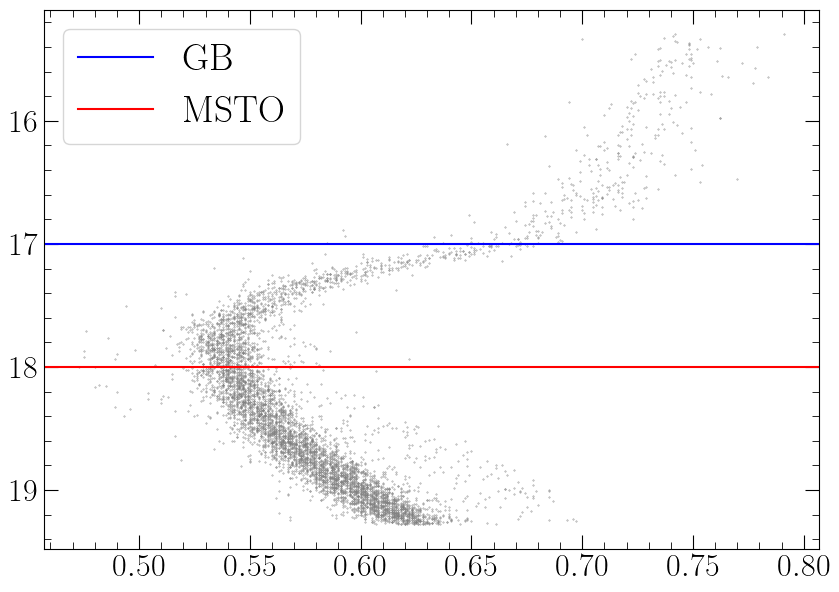

In [90]:
plt.scatter(df['vi'].values,df['v'].values,s=0.1,c='grey')
plt.axhline(17.0,c='b',label='GB')
plt.axhline(18.0,c='r',label='MSTO')
plt.legend()
plt.gca().invert_yaxis()

In [88]:
import vorbin_chi2
from multiprocessing import Pool

In [91]:
MSTO_cut = 18.0
GB_cut = 17.0
GC_name = 'M55'
param_list = []
for i in range(20):
    param_list.append((GC_name,5*i,5*(i+1),MSTO_cut,GB_cut))

In [ ]:
start = time.time()
pool = Pool(10)
pool.starmap(vorbin_chi2.resample, param_list)
end = time.time()